# Introduction

This is an example [sPHENIX](https://github.com/sPHENIX-Collaboration/) [ROOT Jupyter Notebook](https://root.cern.ch/notebooks/HowTos/HowTo_ROOT-Notebooks.html) to run the sPHENIX anaysis on the [BNL SDCC Jupyter Lab](https://jupyter.sdcc.bnl.gov/). Please use lauch the HTC Jupyter hub for this tutorial: 

![SDCC HTC Jupyter Hub](https://jupyter.sdcc.bnl.gov/images/jupyterhub-logo-card-htc.png)

Jupyter Notebook provide an analysis interface that can integrate documentation, code and output plot in a single file. It supports all sPHENIX environment. It is suitable for final analysis step, while large scale analysis and reconstruction should go through the compiled `c++` analysis module.  

Here is an example notebook to run the analysis in ROOT C++ macros. There is also a `pyROOT` macro perform similar task if you would like to use `python` for analysis. 


# Input

The example input file is 2019 TPC test beam ROOT file from the production with [sPHENIX Fun4All framework](https://github.com/sPHENIX-Collaboration/prototype/blob/master/macros/tpc2019/Fun4All_TestBeam_TPC.C). More on the full test beam documentation is at [this wiki page](https://wiki.bnl.gov/sPHENIX/index.php/2019_TPC_FNAL_test_beam) and analysis overview is in the [Offline analysis overview slides on TPC general meeting July 3, 2019](https://indico.bnl.gov/event/6253/#1-first-test-beam-results).

![2019-sPHENIX-testbeam](./images/2019-sPHENIX-testbeam.jpg)

Here we just load one output file that is put on a public web server. That is from run 300, when we put 120 GeV proton beam through the center of the TPC prototye that measures the beam position in 16 planes. The ROOT file contains the reconstructed tracks and clusters. 

![Beam-and-TPC](./images/Beam-and-TPC.png)

Here is [all the online QA plots for this run](https://www.phenix.bnl.gov/phenix/WWW/publish/jinhuang/sPHENIX/TPC2019_QA/Run_300/), we will reproduce two of them in this notebook.

In [1]:
TFile * fDST = TFile::Open("https://www.phenix.bnl.gov/phenix/WWW/publish/jinhuang/sPHENIX/TPC2019_QA/tpc_beam_00000300-0000.evt_TpcPrototypeGenFitTrkFitter.root");


Warning in <TClass::Init>: no dictionary for class PHObject is available
Warning in <TClass::Init>: no dictionary for class SvtxTrack_v1 is available
Warning in <TClass::Init>: no dictionary for class SvtxTrack is available
Warning in <TClass::Init>: no dictionary for class TpcPrototypeTrack is available


Inside the TFile, there are two trees for tracks and clusters:

In [2]:
fDST->ls()

TDavixFile**		https://www.phenix.bnl.gov/phenix/WWW/publish/jinhuang/sPHENIX/TPC2019_QA/tpc_beam_00000300-0000.evt_TpcPrototypeGenFitTrkFitter.root	
 TDavixFile*		https://www.phenix.bnl.gov/phenix/WWW/publish/jinhuang/sPHENIX/TPC2019_QA/tpc_beam_00000300-0000.evt_TpcPrototypeGenFitTrkFitter.root	
  KEY: TTree	T;1	TpcPrototypeGenFitTrkFitter Evaluation
  KEY: TTree	cluster_eval;1	cluster eval tree


Let's checkout what is in the T tree by printing event 1

In [3]:
T->Show(1)

======> EVENT:1
 nTrack          = 1
 TPCTrack        = 1
 TPCTrack.fUniqueID = 0
 TPCTrack.fBits  = 50331648
 TPCTrack.trackID = 0
 TPCTrack.chisq  = 14.413390
 TPCTrack.ndf    = 8
 TPCTrack.px     = -97.363541
 TPCTrack.py     = -22.807943
 TPCTrack.pz     = 0.371238
 TPCTrack.x      = 0.087810
 TPCTrack.y      = -0.573704
 TPCTrack.z      = -12.217271
 TPCTrack.nCluster = 8
 TPCTrack.clusterX[16] = -39.464973 , -40.634251 , -41.859875 , -43.058498 , -44.289875 , 
                    -45.508629 , -46.718132 , -47.938789 , nan , nan , 
                    nan , nan , nan , nan , nan , 
                    nan 

 TPCTrack.clusterY[16] = -9.638797 , -10.117970 , -10.369010 , -10.728765 , -10.956621 , 
                    -11.235226 , -11.551269 , -11.822140 , nan , nan , 
                    nan , nan , nan , nan , nan , 
                    nan 

 TPCTrack.clusterZ[16] = -12.254172 , -12.055928 , -12.090313 , -12.048982 , -12.041853 , 
                    -12.036312 , -11.958266 , -12.

# Plotting

## Number of tracks for each event

A simple example is to check out the distribution of number of tracks reconstructed for each event. As you can see, most event have one track, produced by one 120 GeV proton going through the TPC

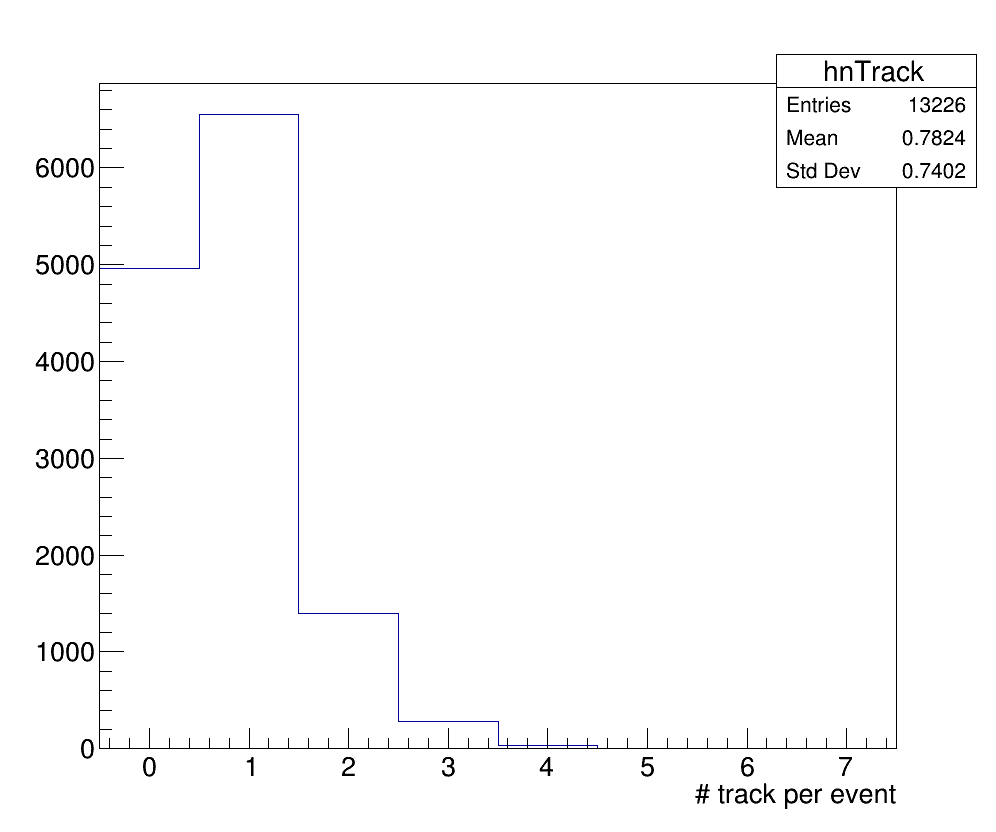

In [4]:

{
    TCanvas *c1 = new TCanvas("TrackQA", "TrackQA", 1000, 860);
    
    //gPad->SetLogy(); // log y if needed
    TH1 *hnTrack = new TH1F("hnTrack", ";# track per event", 8, -.5, 7.5);
    T->Draw("nTrack>>hnTrack");
    
    // Show the canvas in the notebook
    c1->Draw();
}

## 3D imaging of the Fermilab beam

A more fun plot is the draw the clusters on the track in 3D lab coordinate frame (need some rotation from the intrinsic TPC coordinate frame). Here we can show the 3D image of the 120 GeV proton beam through the TPC volumne, which is mostly in the center, with some beam halo and background outside the beam spot. 

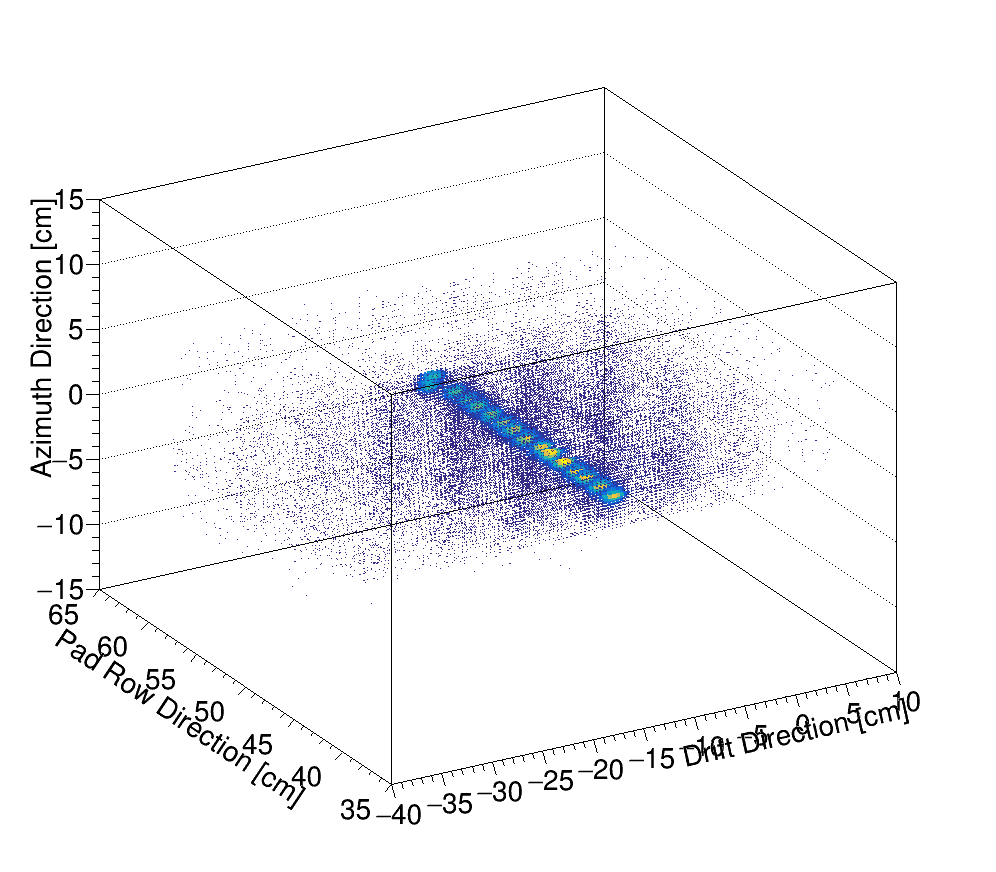

In [5]:
{
    TCanvas *c1 = new TCanvas("Track3D", "Track3D", 1000, 900);

    TH3F *h3ClusterOverlay = new TH3F("h3ClusterOverlay", "h3ClusterOverlay", 128, -40, 10, 64, 35, 65, 128, -15, 15);
    T->SetAlias("PhiCenter", "pi/12 + pi");  // center line azimuthal angle for TPC sector 0

    T->Draw("TPCTrack.clusterX*cos(PhiCenter + pi/2) + TPCTrack.clusterY*sin(PhiCenter + pi/2):TPCTrack.clusterX*cos(PhiCenter) + TPCTrack.clusterY*sin(PhiCenter):TPCTrack.clusterZ>>h3ClusterOverlay", "", "BOX2");
    h3ClusterOverlay->SetTitle(";Drift Direction [cm];Pad Row Direction [cm];Azimuth Direction [cm]");
    h3ClusterOverlay->SetLineWidth(0);

    c1->Draw();
}

That is all to get started. Have fun. 

Here is a more elaborate example: https://github.com/sPHENIX-Collaboration/analysis_tpc_prototype/blob/master/fnal_2019/dEdx/main.ipynb